In [33]:
# 1. import Flask
from flask import Flask, request, render_template, session, redirect, jsonify
import pandas as pd
from splinter import Browser
import requests
from bs4 import BeautifulSoup
import re
import operator as op
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from IPython.display import Image
from IPython.core.display import HTML
from time import sleep

In [43]:
# Dependencies
# import matplotlib.pyplot as plt
# %matplotlib inline

# import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [44]:
# Load the Xception model
# https://keras.io/applications/#xception
model = Xception(
    include_top=True,
    weights='imagenet')

In [45]:
from PIL import Image
import requests
from io import BytesIO

In [37]:
instaid = "jenniferaniston"
url = "https://www.instagram.com/" + instaid
browser = Browser('chrome')
browser.visit(url)
sleep(1)
bs = BeautifulSoup(browser.html, 'html.parser')

#finds all the images in website and puts url in df
images = bs.find_all('img', {'src':re.compile('.jpg')})
image_urls = []
for image in images: 
    image_urls.append(str(image['src']))
image_df = pd.DataFrame({"image":image_urls})

In [5]:
import pandas as pd

In [22]:
image_url = pd.read_csv("image_url.csv")

In [23]:
image_url = image_url["image"]

In [24]:
image_url[1]

'https://scontent-ort2-2.cdninstagram.com/vp/827c8f177ad16e782fd4a69caf510768/5DBE04C1/t51.12442-15/e35/c154.0.778.778a/s150x150/57175007_449458472469323_1529881402847607395_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com&_nc_cat=111'

In [40]:
for u in image_urls:
    url = u
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((299, 299), Image.NEAREST) 

In [42]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


TypeError: 'NoneType' object is not callable

In [46]:
# url = "https://scontent-ort2-2.cdninstagram.com/vp/6e125e29c666c1e9f181d4c7a7df7a86/5E45C63A/t51.2885-19/s320x320/71594249_1125833014288751_8012044229767331840_n.jpg?_nc_ht=scontent-ort2-2.cdninstagram.com"
cnns = []
from PIL import Image
for u in image_urls:
    url = u
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((299, 299), Image.NEAREST) 

    # Preprocess image for model prediction
    # This step handles scaling and normalization for Xception
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Make predictions
    predictions = model.predict(x)
    # print('Predicted:', decode_predictions(predictions, top=1)[0])
    # plt.imshow(img)
    cnns.append(decode_predictions(predictions, top=1)[0][0][1])

In [32]:
cnns

['volleyball',
 'balance_beam',
 'envelope',
 'screen',
 'trench_coat',
 'oxygen_mask',
 'envelope',
 'black-and-tan_coonhound',
 'corkscrew',
 'neck_brace',
 'seat_belt',
 'bullet_train',
 'oboe',
 'crash_helmet',
 'croquet_ball',
 'lumbermill',
 'jersey',
 'suit',
 'feather_boa',
 'miniskirt',
 'monitor',
 'scoreboard',
 'digital_clock',
 'barbell',
 'volleyball',
 'bobsled',
 'miniskirt',
 'bannister',
 'bullet_train',
 'balance_beam',
 'stage',
 'sweatshirt',
 'dumbbell']

In [ ]:
decode_predictions(predictions, top=1)[0][0][1]

In [7]:
# Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n02123394', 'Persian_cat', 0.18115059), ('n02123045', 'tabby', 0.1335955), ('n02123159', 'tiger_cat', 0.0803211)]


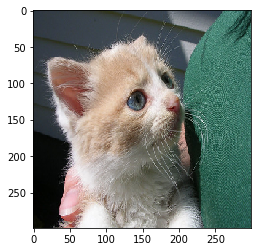

In [8]:
image_path = os.path.join("..", "Images", "kitten.jpg")
predict(image_path)